In [1]:
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
x = pd.read_csv("spotify_data.csv")

In [3]:
x.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
x.drop(columns="Unnamed: 0",inplace=True)
x.drop(columns="acousticness",inplace=True)
x.drop(columns="artist",inplace=True)
x.isnull().sum()

danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
dtype: int64

In [5]:
x = x.filter(["danceability", "energy", "liveness"], axis = 1)

C:\Users\Infinity\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


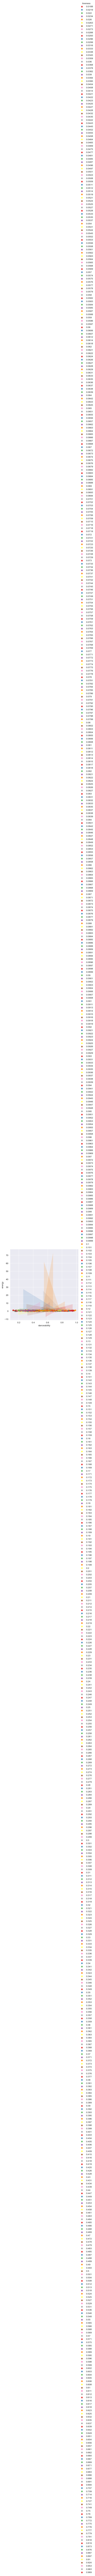

In [6]:
ax = sns.lmplot(x = 'danceability', y='energy', data=x, hue ='liveness', palette='Set1')

<Axes: xlabel='danceability', ylabel='energy'>

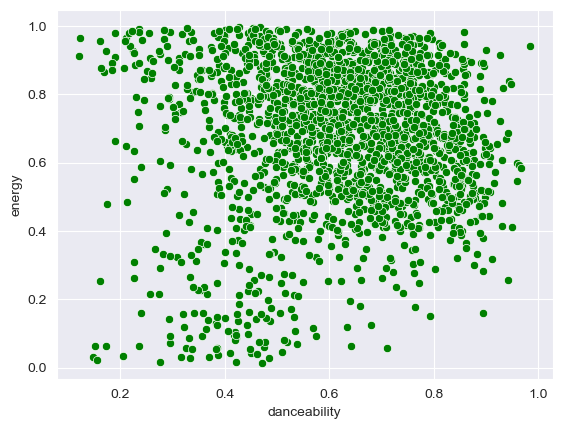

In [7]:
sns.scatterplot(data = x, x="danceability", y="energy", c = ["green"])

In [8]:
model = KMeans(n_clusters=5)
model.fit(x)

C:\Users\Infinity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [9]:
print(model.cluster_centers_)

[[0.70131658 0.82643384 0.15041625]
 [0.44631    0.784585   0.16281825]
 [0.5659292  0.82459735 0.52996018]
 [0.43762827 0.24961309 0.14354241]
 [0.72746269 0.55305307 0.13734494]]


<Axes: xlabel='danceability', ylabel='energy'>

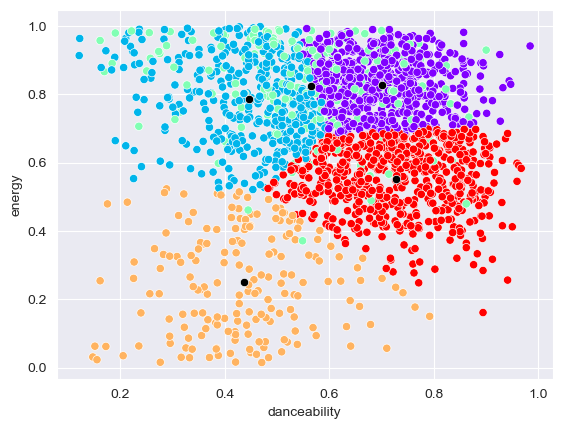

In [10]:
sns.scatterplot (data = x, x="danceability", y="energy",  c=model.labels_, cmap = 'rainbow')
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c=['black'])

In [11]:
x = x.filter(["danceability", "energy", "duration_ms", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo","time_signature", "valence", "target", "song_title"], axis = 1)

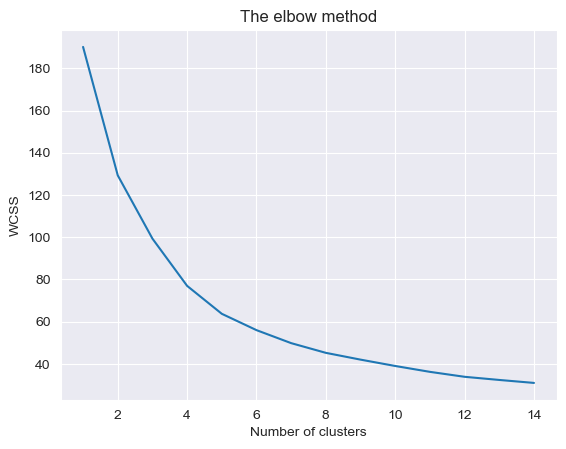

In [12]:
wcss = []

for i in range (1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<Axes: xlabel='danceability', ylabel='energy'>

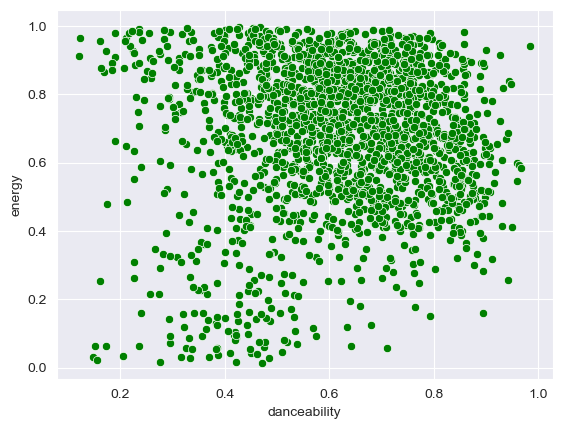

In [13]:
sns.scatterplot(data = x, x="danceability", y="energy", c = ["green"])

In [14]:
model = KMeans(n_clusters=5)
model.fit(x)

C:\Users\Infinity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [15]:
print(model.cluster_centers_)

[[0.72411545 0.55424228 0.13825447]
 [0.56916157 0.82347162 0.52747162]
 [0.44374485 0.79158247 0.16270902]
 [0.43694301 0.25243575 0.14296218]
 [0.70132601 0.82677872 0.14931098]]


<Axes: xlabel='danceability', ylabel='energy'>

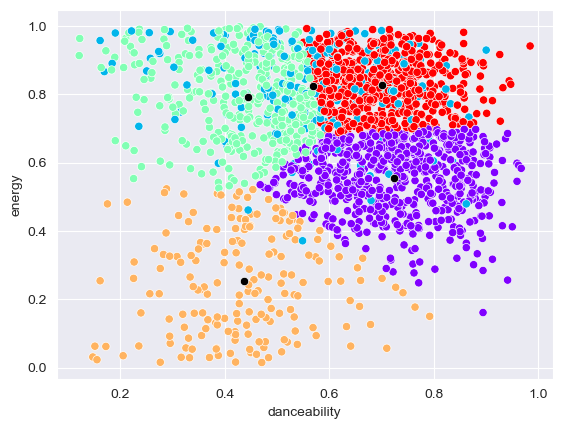

In [16]:
sns.scatterplot (data = x, x="danceability", y="energy",  c=model.labels_, cmap = 'rainbow')
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c=['black'])